In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
headway_df = pd.read_csv('..\Data\headway_data_with_routes.csv')

In [3]:
headway_df.iloc[0:30,0:20]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY
0,120230801,1,99457890,8/1/2023,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,4:42:00,4:37:38,4:44:08,-2.133333,NaN
1,120230801,1,99457891,8/1/2023,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,4:46:00,4:48:27,4:48:27,-2.450000,NaN
2,120230801,1,99457892,8/1/2023,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,4:54:00,4:54:56,4:54:56,-0.933333,NaN
3,120230801,1,99457893,8/1/2023,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,5:10:00,5:03:43,5:03:43,6.283333,NaN
4,120230801,1,99457894,8/1/2023,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,5:15:00,5:03:43,5:16:35,-1.583333,NaN
5,120230801,1,99457895,8/1/2023,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,5:25:00,5:24:03,5:24:03,0.950000,NaN
6,120230801,1,99457896,8/1/2023,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,5:32:00,5:30:30,5:30:30,1.500000,NaN
7,120230801,1,99457897,8/1/2023,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,5:42:00,5:30:30,5:43:43,-1.716666,35.0
8,120230801,1,99457898,8/1/2023,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,5:46:00,5:47:55,5:47:55,-1.916666,35.0
9,120230801,1,99457899,8/1/2023,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,5:54:00,5:54:11,5:54:11,-0.183333,15.0


In [4]:
headway_df.iloc[0:30,20:]

,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,ARRIVAL_STATUS
0,NaN,NaN,0,0,1,0,0.0,0,2,6.500000,ON TIME
1,NaN,NaN,0,0,1,0,0.0,0,9,0.000000,ON TIME
2,NaN,NaN,0,0,1,0,0.0,0,19,0.000000,ON TIME
3,NaN,NaN,0,0,1,0,NaN,0,35,0.000000,ON TIME
4,NaN,NaN,0,0,1,0,0.0,0,36,12.866666,ON TIME
5,NaN,NaN,0,0,1,0,0.0,0,51,0.000000,ON TIME
6,NaN,NaN,0,0,1,0,NaN,0,62,0.000000,ON TIME
7,37.666666,2.666666,0,0,1,0,0.0,0,63,13.216666,ON TIME
8,36.966666,1.966666,0,0,1,0,0.0,0,70,0.000000,ON TIME
9,14.516666,-0.483334,0,0,1,0,0.0,0,80,0.000000,ON TIME


In [5]:
trip_id_list = headway_df['TRIP_ID']
trip_id_list_unique = trip_id_list.unique()
len(trip_id_list_unique)

3987

In [6]:
calendar_id_list = headway_df['CALENDAR_ID']
calendar_id_list_unique = calendar_id_list.unique()
print(calendar_id_list_unique)

[120230801 120230802 120230803 120230804 120230805 120230806 120230807
 120230808 120230809 120230810 120230811 120230812 120230813 120230814
 120230815 120230816 120230817 120230818 120230819 120230820 120230821
 120230822 120230823 120230824 120230825 120230826 120230827 120230828
 120230829 120230830 120230831 120230901 120230902 120230903 120230904
 120230905 120230906 120230907 120230908 120230909 120230910 120230911
 120230912 120230913 120230914 120230915 120230916 120230917 120230918
 120230919 120230920 120230921 120230922 120230923 120230924 120230925
 120230926 120230927 120230928 120230929 120230930]


In [7]:
headway_df['SCHEDULED_TIME']=pd.to_datetime(headway_df['SCHEDULED_TIME']).dt.time

In [8]:
headway_df['ACTUAL_DEPARTURE_TIME']=pd.to_datetime(headway_df['ACTUAL_DEPARTURE_TIME']).dt.time

In [9]:
start_time = time.time()
headway_df_adj = pd.DataFrame(None)
for day in calendar_id_list_unique:    
    sched_start_dict = {}
    actual_start_dict = {}
    headway_df_day = headway_df[headway_df['CALENDAR_ID']==day].copy()
    headway_df_day = headway_df_day.reset_index(drop=True)
    for i in range(len(headway_df_day)):
        if headway_df_day.loc[i,'TRIP_EDGE'] == 1:
            headway_df_day.loc[i,'ROUTE_START_SEQ'] = headway_df_day.loc[i,'ROUTE_STOP_SEQUENCE']
            sched_start_dict.update({headway_df_day.loc[i,'TRIP_ID']:headway_df_day.loc[i,'SCHEDULED_TIME']})
            actual_start_dict.update({headway_df.loc[i,'TRIP_ID']:headway_df_day.loc[i,'ACTUAL_DEPARTURE_TIME']})
        else:
            headway_df_day.loc[i,'ROUTE_START_SEQ'] = np.nan
    
    #Scheduled Trip Start Time
    for i in range(len(headway_df_day)):
        try:
            headway_df_day.loc[i,'ROUTE_SCHED_START'] = sched_start_dict[headway_df_day.loc[i,'TRIP_ID']]
        except:
            pass
    
    #Actual Trip Start Time
    for i in range(len(headway_df_day)):
        try:
            headway_df_day.loc[i,'ROUTE_ACTUAL_START'] = actual_start_dict[headway_df_day.loc[i,'TRIP_ID']]
        except:
            pass
    
    #Sequence adjustment
    route_start_df = headway_df_day.groupby('TRIP_ID',as_index=False)['ROUTE_START_SEQ'].max()   
    route_start_dict = dict(zip(route_start_df['TRIP_ID'], route_start_df['ROUTE_START_SEQ']))
    for i in range(len(headway_df_day)):
        headway_df_day.loc[i,'ROUTE_START_SEQ'] = route_start_dict[headway_df_day.loc[i,'TRIP_ID']]
    
    if headway_df_adj.empty:
        headway_df_adj = headway_df_day.copy()
    else:
        pd.concat([headway_df_adj,headway_df_day], ignore_index=True)
    
    print(f'{day} day is done compiling.')

print(f"Complete! Compliling the full adjusted time and sequence dataframe took: {time.time()-start_time:.2f} seconds")
headway_df_adj.iloc[0:10,30:]

120230801 day is done compiling.
120230802 day is done compiling.
120230803 day is done compiling.
120230804 day is done compiling.
120230805 day is done compiling.
120230806 day is done compiling.
120230807 day is done compiling.
120230808 day is done compiling.
120230809 day is done compiling.
120230810 day is done compiling.
120230811 day is done compiling.
120230812 day is done compiling.
120230813 day is done compiling.
120230814 day is done compiling.
120230815 day is done compiling.
120230816 day is done compiling.
120230817 day is done compiling.
120230818 day is done compiling.
120230819 day is done compiling.
120230820 day is done compiling.
120230821 day is done compiling.
120230822 day is done compiling.
120230823 day is done compiling.
120230824 day is done compiling.
120230825 day is done compiling.
120230826 day is done compiling.
120230827 day is done compiling.
120230828 day is done compiling.
120230829 day is done compiling.
120230830 day is done compiling.
120230831 

,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START
0,ON TIME,14.0,04:42:00,04:44:08
1,ON TIME,14.0,04:42:00,04:44:08
2,ON TIME,14.0,04:42:00,04:44:08
3,ON TIME,14.0,04:42:00,04:44:08
4,ON TIME,1.0,05:15:00,05:16:35
5,ON TIME,1.0,05:15:00,05:16:35
6,ON TIME,1.0,05:15:00,05:16:35
7,ON TIME,14.0,05:42:00,05:43:43
8,ON TIME,14.0,05:42:00,05:43:43
9,ON TIME,14.0,05:42:00,05:43:43


In [10]:
headway_df_adj['STOP_SEQ_ADJ'] = abs(headway_df_adj['ROUTE_START_SEQ']-headway_df_adj['ROUTE_STOP_SEQUENCE'])+1
headway_df_adj.iloc[0:10,30:]

,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ
0,ON TIME,14.0,04:42:00,04:44:08,1.0
1,ON TIME,14.0,04:42:00,04:44:08,5.0
2,ON TIME,14.0,04:42:00,04:44:08,10.0
3,ON TIME,14.0,04:42:00,04:44:08,14.0
4,ON TIME,1.0,05:15:00,05:16:35,1.0
5,ON TIME,1.0,05:15:00,05:16:35,5.0
6,ON TIME,1.0,05:15:00,05:16:35,14.0
7,ON TIME,14.0,05:42:00,05:43:43,1.0
8,ON TIME,14.0,05:42:00,05:43:43,5.0
9,ON TIME,14.0,05:42:00,05:43:43,10.0


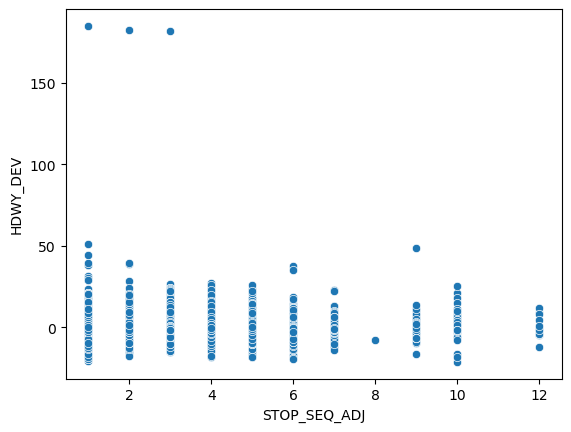

In [11]:
sns.scatterplot(data=headway_df_adj, x= 'STOP_SEQ_ADJ', y='HDWY_DEV');

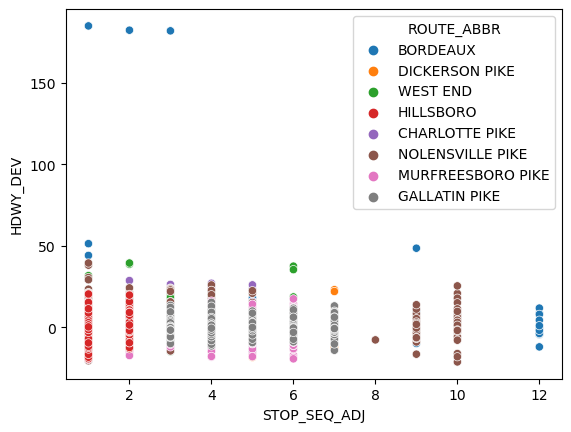

In [12]:
sns.scatterplot(data=headway_df_adj, x= 'STOP_SEQ_ADJ', y='HDWY_DEV',hue='ROUTE_ABBR');

In [13]:
headway_df_adj['STOP_SEQ_ADJ_RANK'] = headway_df_adj.groupby(['CALENDAR_ID','TRIP_ID'])['STOP_SEQ_ADJ'].rank('max').copy()

In [14]:
headway_df_adj.head(50)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,ARRIVAL_STATUS,ROUTE_START_SEQ,ROUTE_SCHED_START,ROUTE_ACTUAL_START,STOP_SEQ_ADJ,STOP_SEQ_ADJ_RANK
0,120230801,1,99457890,8/1/2023,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,...,0.0,0,2,6.500000,ON TIME,14.0,04:42:00,04:44:08,1.0,1.0
1,120230801,1,99457891,8/1/2023,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,...,0.0,0,9,0.000000,ON TIME,14.0,04:42:00,04:44:08,5.0,2.0
2,120230801,1,99457892,8/1/2023,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,...,0.0,0,19,0.000000,ON TIME,14.0,04:42:00,04:44:08,10.0,3.0
3,120230801,1,99457893,8/1/2023,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,35,0.000000,ON TIME,14.0,04:42:00,04:44:08,14.0,4.0
4,120230801,1,99457894,8/1/2023,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,...,0.0,0,36,12.866666,ON TIME,1.0,05:15:00,05:16:35,1.0,1.0
5,120230801,1,99457895,8/1/2023,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,...,0.0,0,51,0.000000,ON TIME,1.0,05:15:00,05:16:35,5.0,2.0
6,120230801,1,99457896,8/1/2023,BORDEAUX,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,62,0.000000,ON TIME,1.0,05:15:00,05:16:35,14.0,3.0
7,120230801,1,99457897,8/1/2023,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,...,0.0,0,63,13.216666,ON TIME,14.0,05:42:00,05:43:43,1.0,1.0
8,120230801,1,99457898,8/1/2023,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,...,0.0,0,70,0.000000,ON TIME,14.0,05:42:00,05:43:43,5.0,2.0
9,120230801,1,99457899,8/1/2023,BORDEAUX,2200,1040,345106,0,TO DOWNTOWN,...,0.0,0,80,0.000000,ON TIME,14.0,05:42:00,05:43:43,10.0,3.0


In [15]:
headway_df_adj[headway_df_adj['TRIP_ID']==345104].iloc[0:30,0:20]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY
0,120230801,1,99457890,8/1/2023,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,04:42:00,4:37:38,04:44:08,-2.133333,NaN
1,120230801,1,99457891,8/1/2023,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,04:46:00,4:48:27,04:48:27,-2.450000,NaN
2,120230801,1,99457892,8/1/2023,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,04:54:00,4:54:56,04:54:56,-0.933333,NaN
3,120230801,1,99457893,8/1/2023,BORDEAUX,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,05:10:00,5:03:43,05:03:43,6.283333,NaN


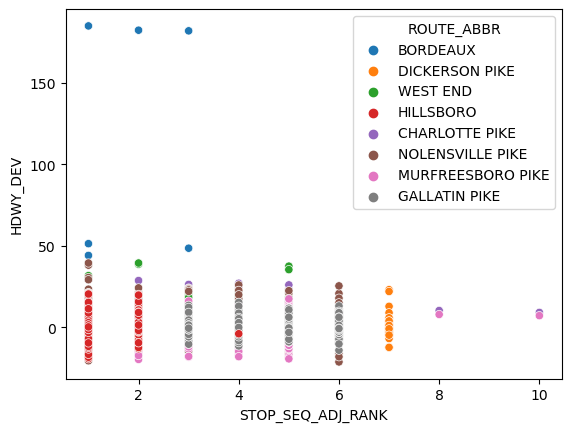

In [17]:
sns.scatterplot(data=headway_df_adj, x= 'STOP_SEQ_ADJ_RANK', y='HDWY_DEV', hue='ROUTE_ABBR');